## Data preperation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import classification_report
import pprint
from sklearn.metrics import accuracy_score
import scipy.io

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global variables.
attribute_names = []
X = []
y = []
class_names = ['False', 'True']
figure_counter = 1

# Load csv dataset (Brain Tumor.csv).
data = pd.read_csv(r'./data/Brain Tumor.csv', header=0)
dataframe = pd.DataFrame(data)

# Attribute_names label.
attribute_names = list(data.columns)

# All data features with 'Class' removed.
X = dataframe.drop(['Class', 'Image'], axis=1).values

# Classifier for brain tumor (true or false).
y = dataframe['Class'].to_numpy()

dataframe.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
# Information about the dataframe.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [4]:
# Sum of all empty/missing values.
dataframe.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

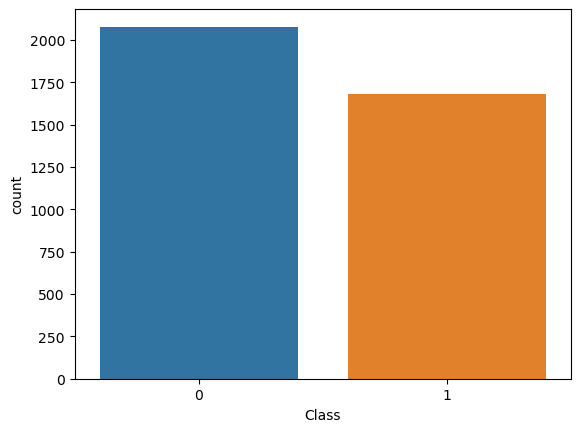

Figure 1: Visualization of classifiction of brain tumors.


In [5]:
# Distribution of the classification of brain tumors.
sns.countplot(dataframe['Class'])
plt.show()
print(f"Figure {figure_counter}: Visualization of classifiction of brain tumors.")
figure_counter+=1

In [6]:
# Split data into training and test samples (67/33).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## Decision tree algorithm

In [7]:
# Create decision tree model.
dtc = DecisionTreeClassifier()

# Define hyperparameters in a dictionary.
parameters = {
    'splitter' : ['best', 'random'],
    'criterion' : ['gini', 'entropy'],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1,5,8,11],
    'random_state' : [0,1,2,3,4,5]
}

# Create a gridsearch object with dtc estimator, 5-fold cross validation, paramaters (defined above) and f1 scoring.
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=parameters, scoring='f1', cv=5, verbose=1, return_train_score=True)

# Fit the data.
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='f1', verbose=1)

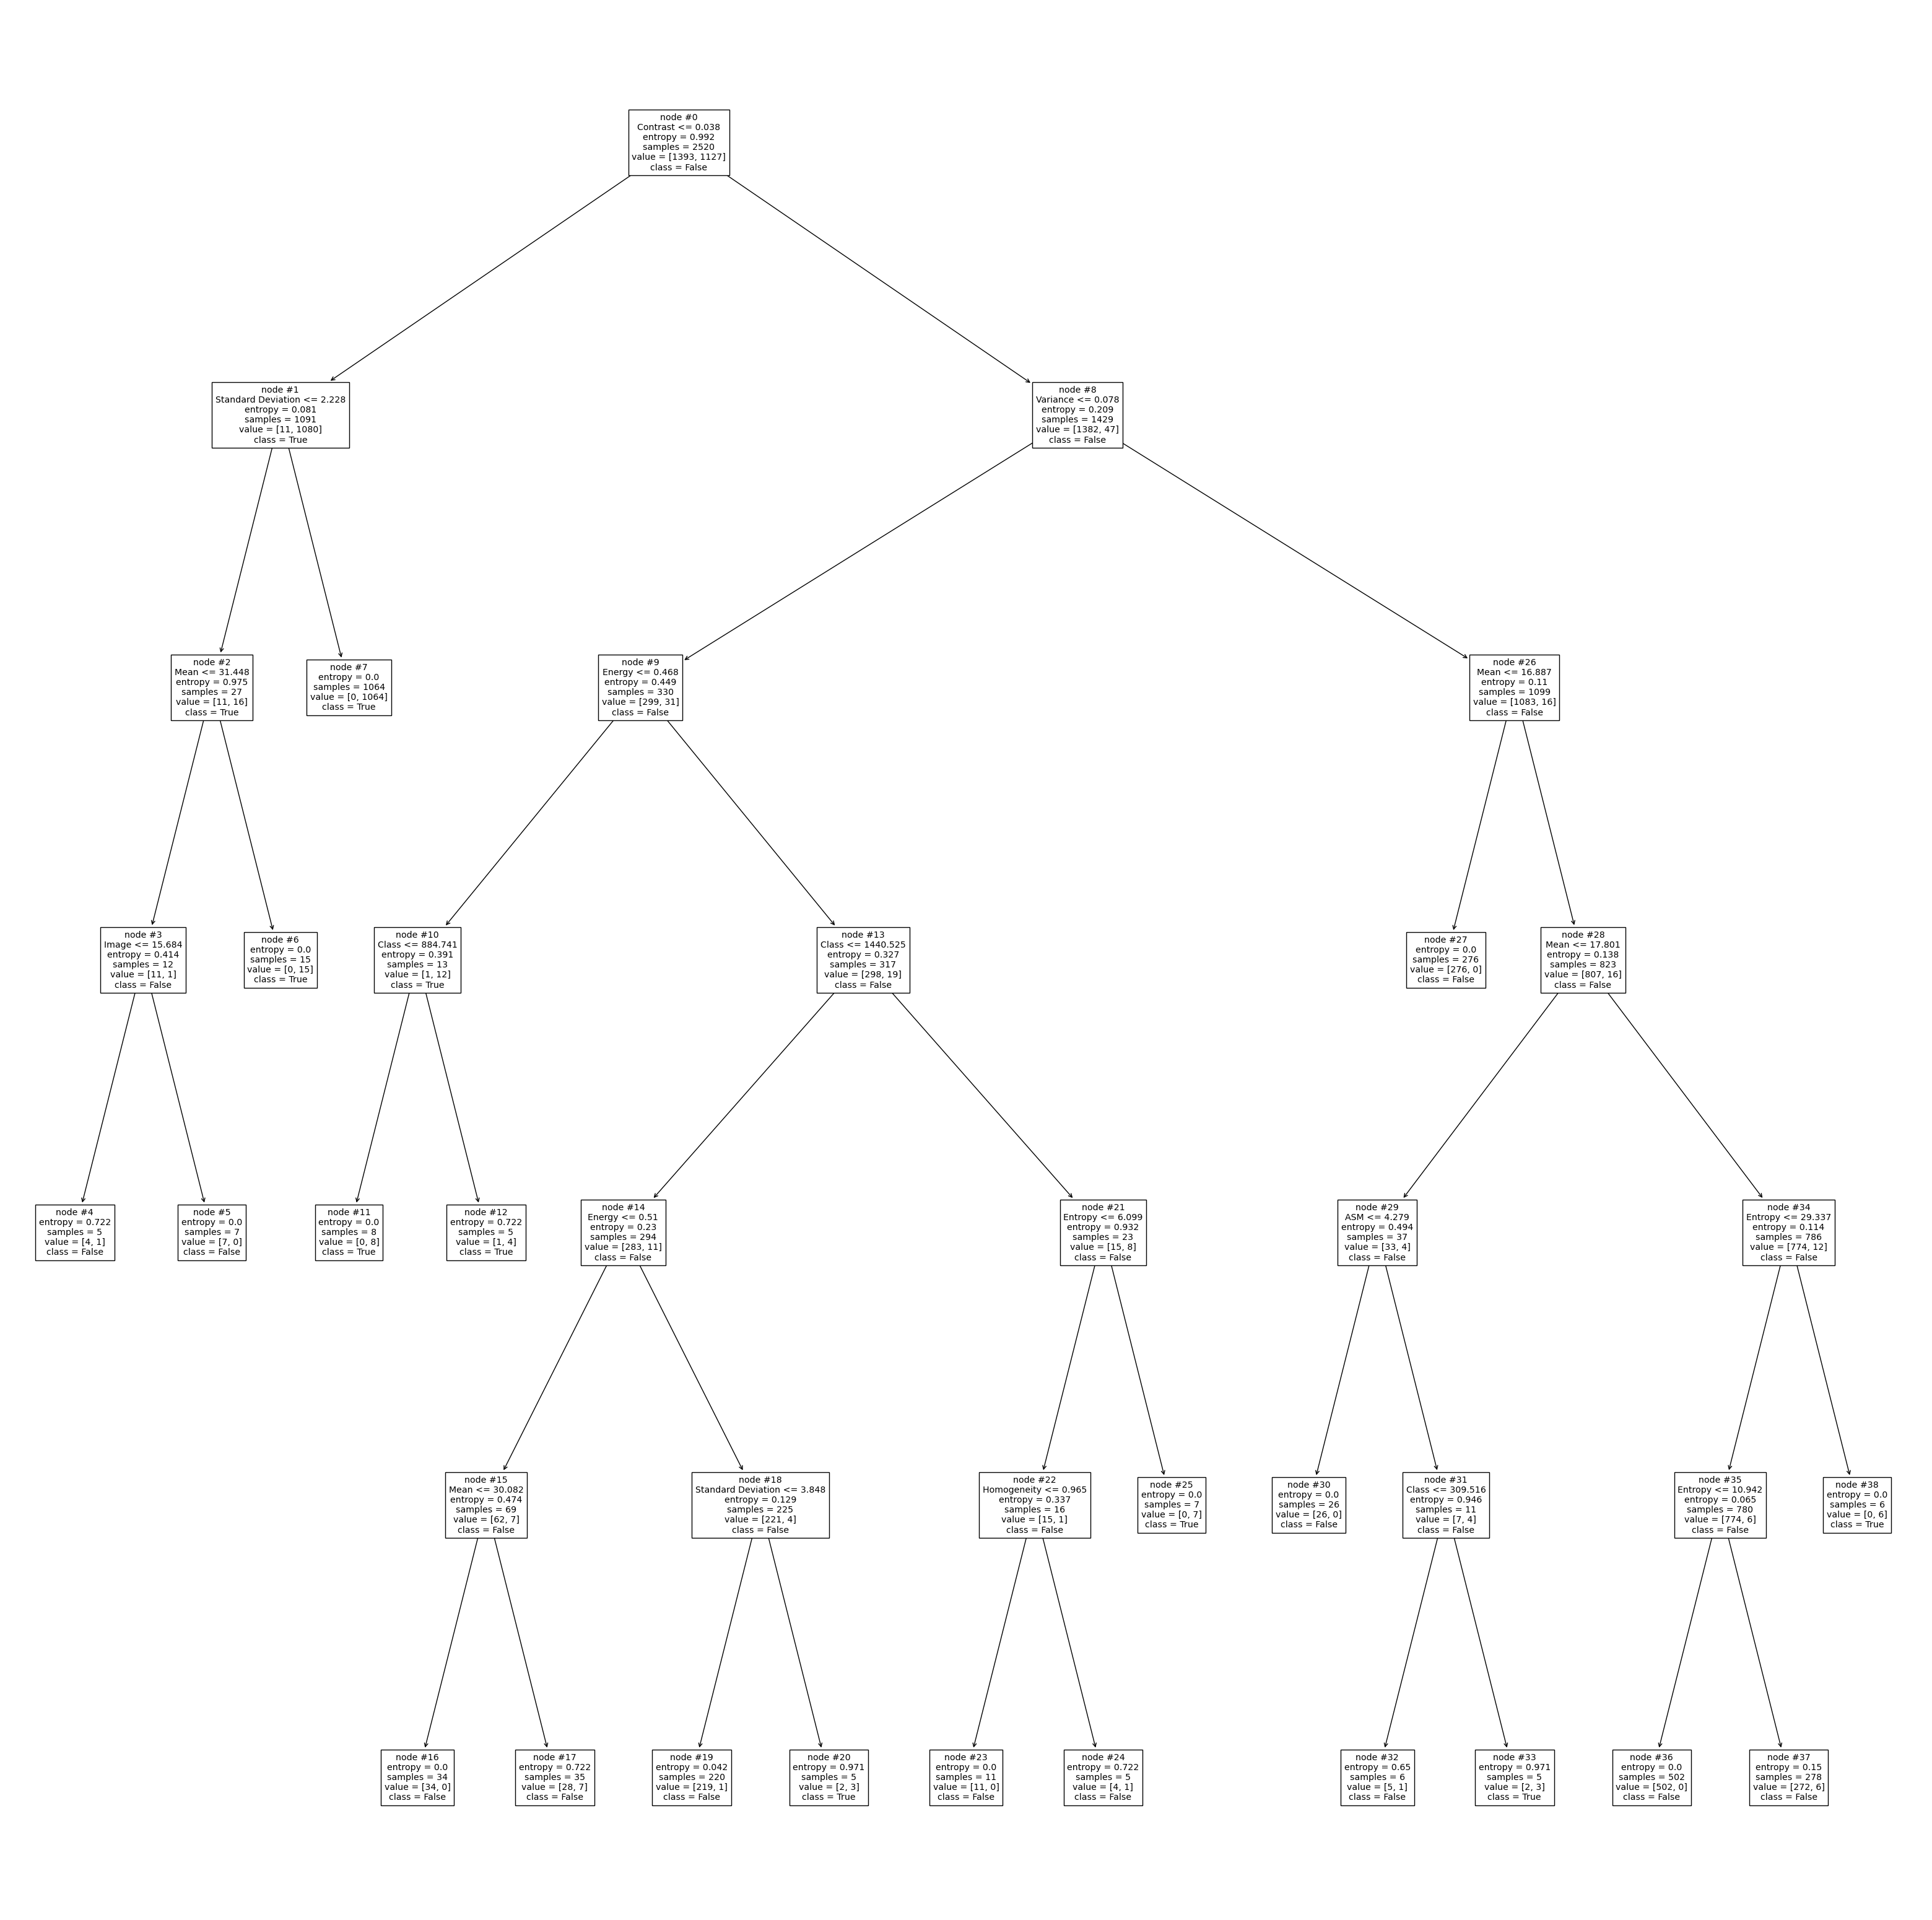

Figure 2: A generated Decision tree from Brain Tumor.csv based on the best estimators.


In [8]:
# Plot decision tree.
plt.figure(figsize=(40,40))
tree.plot_tree(grid_search_dtc.best_estimator_, feature_names = attribute_names, class_names = class_names, node_ids = True)
plt.show()
print(f"Figure {figure_counter}: A generated Decision tree from Brain Tumor.csv based on the best estimators.")
figure_counter+=1

In [9]:
# F1-score of our descicion tree algorithm.
f1_test_score_dtc_1 = grid_search_dtc.score(X_test, y_test) * 100
print("Score for our testing dataset is: {:.2f}%".format(f1_test_score_dtc_1) )
# Best estimators for our descicion tree algorithm.
print(f'Best estimators for the dataset are: {grid_search_dtc.best_params_}')

Score for our testing dataset is: 97.64%
Best estimators for the dataset are: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 2, 'splitter': 'best'}


In [10]:
# Check if model is overfitting.
dtc_accuracy_train = accuracy_score(y_train, grid_search_dtc.predict(X_train)) * 100
dtc_accuracy_test = accuracy_score(y_test, grid_search_dtc.predict(X_test)) * 100
print(f'Accuracy score for train data: {dtc_accuracy_train}')
print(f'Accuracy score for test data: {dtc_accuracy_test}')

Accuracy score for train data: 99.12698412698413
Accuracy score for test data: 97.90660225442835


In [11]:
# Take random sample and make a prediction.
num = random.randrange(len(X))
sample = X[[num]]
print(f'Prediction for number {num} with sample content {sample}')
prediction = grid_search_dtc.predict(sample.reshape(1, -1))[0]

print(grid_search_dtc.best_estimator_.decision_path(sample))
print(f"Predicted class: {class_names[prediction]}")
print(f"Actual class: {y[[num]]}")

Prediction for number 3183 with sample content [[1.04171753e-001 1.45939510e+001 3.82020300e+000 3.03574893e-002
  3.69312941e+001 1.37164006e+003 1.02571429e+002 1.46771762e-001
  2.15419501e-002 2.27912787e-001 7.42857143e+000 5.49426249e-001
  7.45834073e-155]]
  (0, 0)	1
  (0, 1)	1
  (0, 7)	1
Predicted class: True
Actual class: [1]


In [12]:
import pydotplus

test = dataframe.drop(['Class', 'Image'], axis=1)
attribute_names2 = list(test.columns)
num = random.randrange(len(X))
display(data.iloc[num,:].to_frame().T)


# code from https://stackoverflow.com/a/55879031
dot_data = tree.export_graphviz(grid_search_dtc.best_estimator_, out_file=None,
                                feature_names=attribute_names2,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# empty all nodes, i.e.set color to white and number of samples to zero
for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

decision_paths = grid_search_dtc.best_estimator_.decision_path(test.iloc[num,:].to_frame().T)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

filename = 'decision_path_visualization.png'
graph.write_png(filename)

ModuleNotFoundError: No module named 'pydotplus'

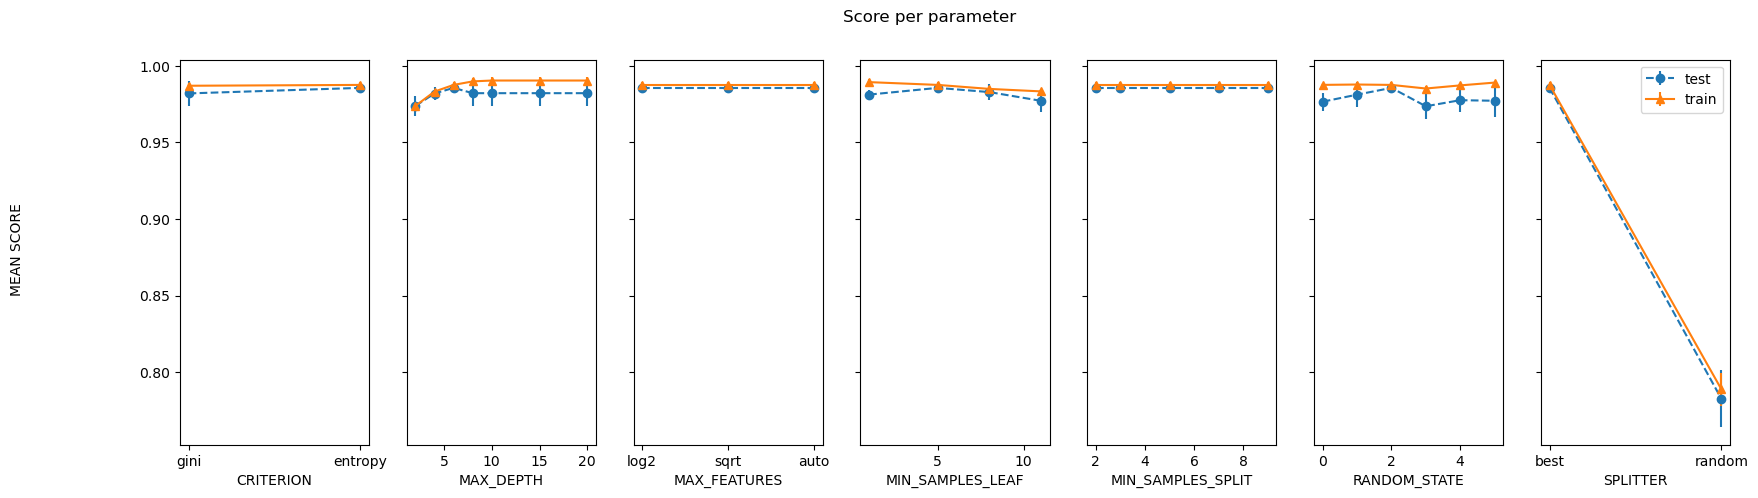

Figure 3: Visualization of test and train data of decision tree.


In [13]:
# Code from https://stackoverflow.com/a/57013458
def plot_search_results(grid):

    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
plot_search_results(grid_search_dtc)
print(f"Figure {figure_counter}: Visualization of test and train data of decision tree.")
figure_counter+=1

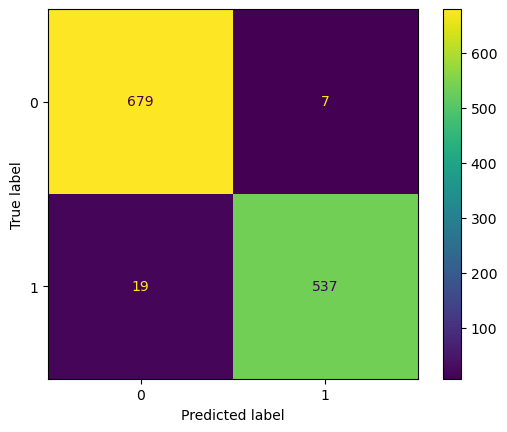

Figure 4: Confusion matrix of the test data from decision tree.


In [14]:
# Plot confusion matrix of test data of decision tree.
plot_confusion_matrix(grid_search_dtc, X_test, y_test)
plt.show()
print(f"Figure {figure_counter}: Confusion matrix of the test data from decision tree.")
figure_counter+=1

In [15]:
# Print classification report for DTC
dtc_report = classification_report(y_true=y_test, y_pred=grid_search_dtc.predict(X_test), output_dict=True)
f1_test_score_dtc_0 = dtc_report['0']['f1-score'] * 100
pprint.pprint(dtc_report)

{'0': {'f1-score': 0.9812138728323699,
       'precision': 0.9727793696275072,
       'recall': 0.9897959183673469,
       'support': 686},
 '1': {'f1-score': 0.9763636363636363,
       'precision': 0.9871323529411765,
       'recall': 0.9658273381294964,
       'support': 556},
 'accuracy': 0.9790660225442834,
 'macro avg': {'f1-score': 0.9787887545980032,
               'precision': 0.9799558612843419,
               'recall': 0.9778116282484217,
               'support': 1242},
 'weighted avg': {'f1-score': 0.9790425914502315,
                  'precision': 0.9792046987115653,
                  'recall': 0.9790660225442834,
                  'support': 1242}}


## K-nearest neighbour algorithm

In [16]:
# List Hyperparameters that we want to tune.
leaf_size = [5,10,15,20,25,30,35,40,45,50,55]
n_neighbors = list(range(1, 31))
weights = ['distance', 'uniform', 'None']
p=[1,2]

# Convert to dictionary.
hyperparameters = dict(n_neighbors=n_neighbors , weights=weights, leaf_size=leaf_size, p=p)

knn = KNeighborsClassifier()
  
# Defining parameter range.
grid_search_knn = GridSearchCV(knn, hyperparameters, cv=5, scoring='f1', return_train_score=True, verbose=1)
  
# Fitting the model for grid search
grid_search_knn.fit(X_train, y_train)

print(f'Best parameters for the dataset are: {grid_search_knn.best_params_}')

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
Best parameters for the dataset are: {'leaf_size': 5, 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [17]:
# Calculating f1-score with best performing parmeters.
y_test_pred = grid_search_knn.predict(X_test) 
f1_test_score_knn_1 = f1_score(y_test, y_test_pred) * 100

print("F1-score for our testing dataset with tuning is : {:.2f}%".format(f1_test_score_knn_1) )

F1-score for our testing dataset with tuning is : 83.95%


In [18]:
# Check if model is overfitting.
knn_accuracy_train = accuracy_score(y_train, grid_search_knn.predict(X_train)) * 100
knn_accuracy_test = accuracy_score(y_test, grid_search_knn.predict(X_test)) * 100
print(f'Accuracy score for train data: {knn_accuracy_train}')
print(f'Accuracy score for test data: {knn_accuracy_test}')

Accuracy score for train data: 100.0
Accuracy score for test data: 86.39291465378422


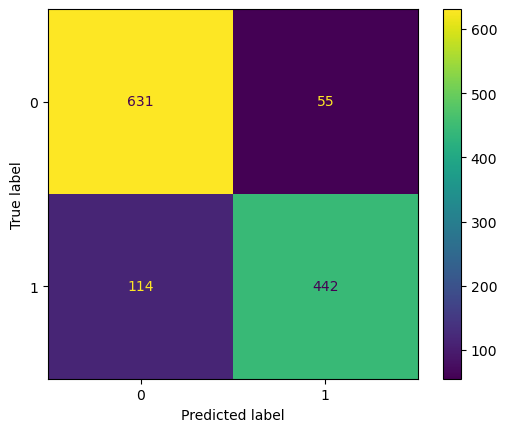

Figure 5: Confusion matrix of the test data from k-nearest neighbour.


In [19]:
# Plot confusion matrix of test data of k-nearest neighbour.
plot_confusion_matrix(grid_search_knn, X_test, y_test)
plt.show()
print(f"Figure {figure_counter}: Confusion matrix of the test data from k-nearest neighbour.")
figure_counter+=1

In [20]:
# Print classification report for KNN
knn_report = classification_report(y_true=y_test, y_pred=y_test_pred, output_dict=True)
f1_test_score_knn_0 = knn_report['0']['f1-score'] * 100
pprint.pprint(knn_report)

{'0': {'f1-score': 0.8819007686932214,
       'precision': 0.8469798657718121,
       'recall': 0.9198250728862973,
       'support': 686},
 '1': {'f1-score': 0.8395061728395061,
       'precision': 0.8893360160965795,
       'recall': 0.7949640287769785,
       'support': 556},
 'accuracy': 0.8639291465378421,
 'macro avg': {'f1-score': 0.8607034707663638,
               'precision': 0.8681579409341957,
               'recall': 0.8573945508316378,
               'support': 1242},
 'weighted avg': {'f1-score': 0.8629221895509785,
                  'precision': 0.8659412341941718,
                  'recall': 0.8639291465378421,
                  'support': 1242}}


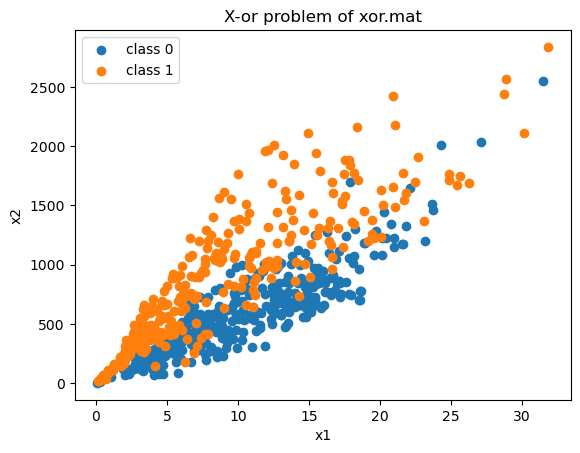

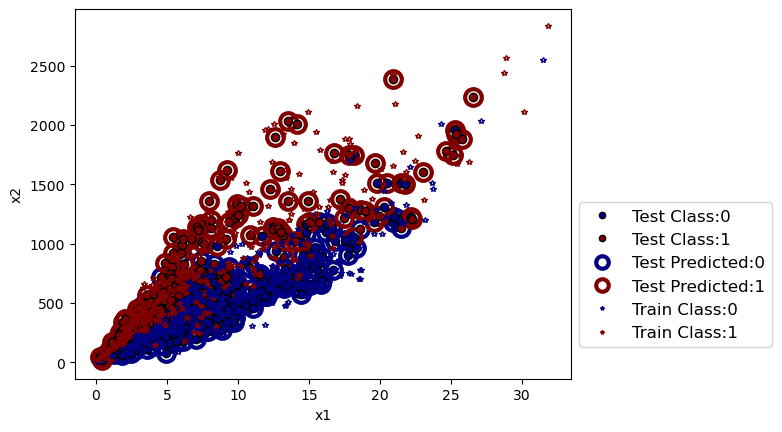

Accuracy score for train data: 100.0
Accuracy score for test data: 78.18181818181819


In [26]:
import warnings
import matplotlib.colors
from toolbox.classification_plot import classification_plot

#X = dataframe.drop(['Class', 'Image', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Contrast', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness', 'Energy', 'ASM'], axis=1).values
#knn = KNeighborsClassifier(n_neighbors=grid_search_knn.bestparams['n_neighbors'], leaf_size=grid_search_knn.bestparams['leaf_size'], p=grid_search_knn.bestparams['p'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#knn.fit(X_train, y_train)
#y_test_pred = knn.predict(X_test) 

test_frame = dataframe.sample(n = 1000)
X_small = test_frame.drop(['Class', 'Image'], axis=1).values
y_small = test_frame['Class'].to_numpy()
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.33, stratify=y_small)
knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'], leaf_size=grid_search_knn.best_params_['leaf_size'], p=grid_search_knn.best_params_['p'], weights=grid_search_knn.best_params_['weights'])
knn.fit(X_train_small, y_train_small)
y_test_pred_small = knn.predict(X_test_small) 

for classs in np.unique(y_small):
    plt.scatter(X_train_small[y_train_small.flatten() == classs, 0], X_train_small[y_train_small.flatten() == classs, 1], label =f'class {classs}')
plt.title('X-or problem of xor.mat')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

classification_plot(X_test_small, y_test_small, y_test_pred_small, X_train = X_train_small, y_train = y_train_small)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

knn_accuracy_train_small = accuracy_score(y_train_small, knn.predict(X_train_small)) * 100
knn_accuracy_test_small = accuracy_score(y_test_small, knn.predict(X_test_small)) * 100
print(f'Accuracy score for train data: {knn_accuracy_train_small}')
print(f'Accuracy score for test data: {knn_accuracy_test_small}')

## Model comparison

In [22]:
comparisonData = {"Classification Algorithms": ["Decision Tree Classifier", "KNN Classifier"],
      "F1-score 0 classification": [f1_test_score_dtc_0, f1_test_score_knn_0],
      "F1-score 1 classification": [f1_test_score_dtc_1, f1_test_score_knn_1],
      "Accuracy score": [dtc_accuracy_test, knn_accuracy_test]}
comparison = pd.DataFrame(comparisonData)
comparison

,Classification Algorithms,F1-score 0 classification,F1-score 1 classification,Accuracy score
0,Decision Tree Classifier,98.121387,97.636364,97.906602
1,KNN Classifier,88.190077,83.950617,86.392915
